In [2]:
import csv
import numpy as np
import pandas as pd
from math import factorial

import datetime
from datetime import date
import datetime
import time

import scipy
import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

In [24]:
size = 20
title_FontSize = 10
legend_FontSize = 14
tick_FontSize = 18
label_FontSize = 14

params = {'legend.fontsize': 17,
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/data_deBug/"

In [3]:
# df = pd.read_csv(data_dir + "00_noOutlier_int_Grant_Irr_2008_2018_EVI_500randomfields.csv")
# df.dropna(inplace=True)

### Check SG result

In [34]:
df = pd.read_csv(data_dir + "04_SG_int_Grant_Irr_2008_2018_EVI_100randomfields.csv")
df['human_system_start_time'] = pd.to_datetime(df['human_system_start_time'])

In [35]:
IDs = df.ID.unique()
len(IDs)

100

In [47]:
IDs[0]

'i17302'

In [36]:
curr_field = df[df['ID']==IDs[0]].copy()

In [37]:
curr_field.EVI.max()

0.7546081338965986

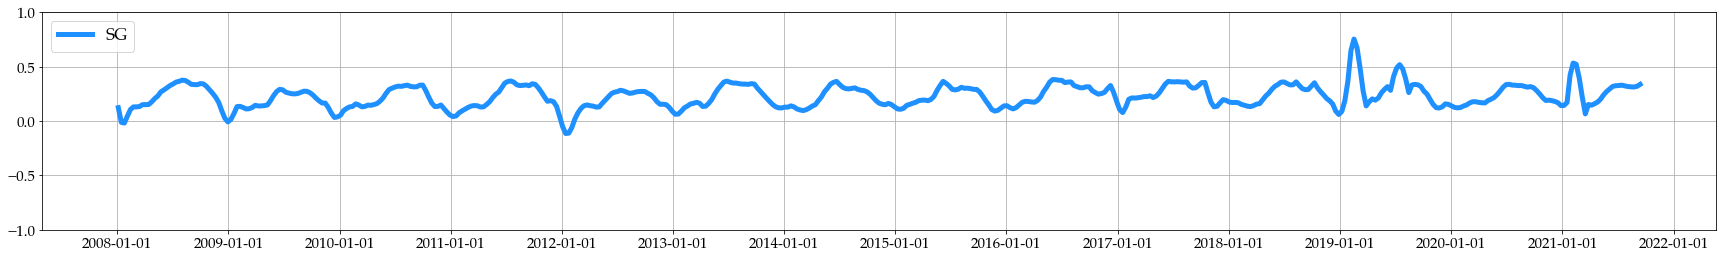

In [48]:
regularized_TS.tail(0)

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(30, 4),
                        sharex='col', sharey='row',
                        # sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.2, 'wspace': .05});
ax.grid(True);
ax.plot(curr_field['human_system_start_time'], 
        curr_field['EVI'], 
        '-', linewidth=5, color='dodgerblue', label = "SG")
ax.xaxis.set_major_locator(mdates.YearLocator(1)) # every year.
ax.legend(loc="upper left");
ax.set_ylim(-1, 1)

plot_dir = "/Users/hn/Desktop/"
file_name = plot_dir + "i17302.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

,ID,human_system_start_time,EVI
406,i17302,2019-02-16,0.754608


In [45]:
curr_field.loc[403:408, ]

,ID,human_system_start_time,EVI
403,i17302,2019-01-17,0.188647
404,i17302,2019-01-27,0.369767
405,i17302,2019-02-06,0.648995
406,i17302,2019-02-16,0.754608
407,i17302,2019-02-26,0.674149
408,i17302,2019-03-08,0.487421


In [46]:
regular = pd.read_csv(data_dir + "03_regular_int_Grant_Irr_2008_2018_EVI_100randomfields.csv")
regular['human_system_start_time'] = pd.to_datetime(regular['human_system_start_time'])

In [6]:
SF_data = pd.read_csv("/Users/hn/Documents/01_research_data/NASA/data_part_of_shapefile/Grant2017.csv")

In [5]:
Grant = pd.read_csv("/Users/hn/Documents/01_research_data/NASA/data_deBug/SG_Grant2017_NDVI.csv")

In [7]:
Grant.head(2)

,ID,human_system_start_time,NDVI
0,100000_WSDA_SF_2017,2008-01-01,0.000557
1,100000_WSDA_SF_2017,2008-01-11,0.000557


In [8]:
SF_data.head(2)

,ID,CropTyp,Acres,Irrigtn,LstSrvD,DataSrc,county,ExctAcr,CropGrp
0,98023_WSDA_SF_2017,apple,7,sprinkler,2017/07/11,wsda,Grant,6.661555,Orchard
1,98024_WSDA_SF_2017,wheat,121,center pivot,2017/12/31,nass,Grant,121.289318,Cereal Grain


In [40]:
# check =  all(item in list(Grant.ID) for item in list(SF_data.ID))
# check

KeyboardInterrupt: 

In [43]:
print (len(Grant.ID))
print (len(Grant.ID.unique()))
print (Grant.shape)
Grant.head(2)

9064019
17705
(9064019, 3)


,ID,human_system_start_time,NDVI
0,100000_WSDA_SF_2017,2008-01-01,0.000557
1,100000_WSDA_SF_2017,2008-01-11,0.000557


In [44]:
SF_data.shape

(17705, 9)

In [45]:
SF_data = nc.filter_by_lastSurvey(SF_data, year = "2017") 
SF_data = nc.filter_out_NASS(SF_data)         # Toss NASS
SF_data = nc.filter_out_nonIrrigated(SF_data) # keep only irrigated lands

In [46]:
SF_data.shape

(9175, 9)

In [48]:
fuck = list(SF_data.ID)

In [50]:
Grant.shape

(9064019, 3)

In [51]:
Grant = Grant[Grant.ID.isin(fuck)]

In [53]:
Grant.shape

(4696940, 3)